In [1]:
# KNN Classification
import pandas as pd
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
glass=read_csv('D:\\Data Science\\Assignments\\Assignment 13 (KNN)\\glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
glass.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [4]:
glass.shape

(214, 10)

In [6]:
array=glass.values
X=array[:,0:9]
Y=array[:,8]

In [7]:
scale=StandardScaler()
scaled_data=scale.fit_transform(X)

In [8]:
scaled_data

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [9]:
X=scaled_data
X

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [10]:
Y

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.26, 0.  , 0.  , 0.  , 0.11, 0.24,
       0.  , 0.24, 0.17, 0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.19, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.22,
       0.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.3 , 0.  , 0.16, 0.1 , 0.  , 0.  , 0.16, 0.11, 0.  , 0.  , 0.09,
       0.24, 0.31, 0.  , 0.  , 0.11, 0.  , 0.  , 0.11, 0.  , 0.07, 0.  ,
       0.17, 0.17, 0.16, 0.03, 0.12, 0.32, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.14, 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.  , 0.  , 0.1 ,
       0.  , 0.09, 0.22, 0.  , 0.19, 0.  , 0.  , 0.  , 0.15, 0.24, 0.  ,
       0.  , 0.22, 0.  , 0.2 , 0.  , 0.  , 0.34, 0.28, 0.24, 0.08, 0.  ,
       0.  , 0.  , 0.  , 0.14, 0.  , 0.  , 0.1 , 0.  , 0.29, 0.  , 0.  ,
       0.21, 0.  , 0.  , 0.  , 0.12, 0.  , 0.17, 0.17, 0.18, 0.  , 0.1 ,
       0.  , 0.15, 0.  , 0.28, 0.12, 0.  , 0.  , 0.  , 0.  , 0.17, 0.25,
       0.  , 0.24, 0.35, 0.  , 0.  , 0.1 , 0.  , 0.

In [13]:
ss = StandardScaler()

In [16]:
ss.fit(glass.drop('Type',axis=1))

StandardScaler()

In [17]:
features = ss.transform(glass.drop('Type',axis=1))
feature_frame = pd.DataFrame(features,columns=glass.columns[:-1])
feature_frame

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


<AxesSubplot:>

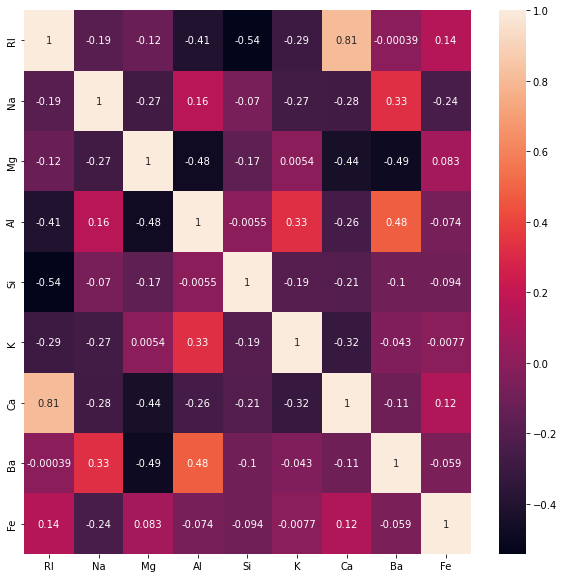

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(feature_frame.iloc[:,0:].corr(),annot=True)

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(feature_frame,glass['Type'],test_size=0.30)

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
pred = knn.predict(X_test)

In [27]:
from sklearn.metrics import classification_report , confusion_matrix

In [28]:
print(confusion_matrix(y_test,pred))

[[16  8  1  0  0  0]
 [ 5 11  0  1  0  0]
 [ 2  3  2  0  0  0]
 [ 0  0  0  1  0  2]
 [ 0  1  0  0  4  2]
 [ 1  0  0  0  0  5]]


In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.67      0.64      0.65        25
           2       0.48      0.65      0.55        17
           3       0.67      0.29      0.40         7
           5       0.50      0.33      0.40         3
           6       1.00      0.57      0.73         7
           7       0.56      0.83      0.67         6

    accuracy                           0.60        65
   macro avg       0.64      0.55      0.57        65
weighted avg       0.64      0.60      0.60        65



In [30]:
error_rate = []

for i in range(1,70):
    knn   = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

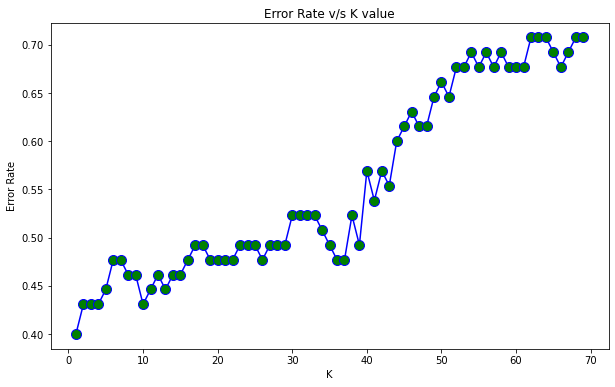

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,70),error_rate,color='blue',linestyle='solid',marker='o',markerfacecolor='green',markersize=10)
plt.title('Error Rate v/s K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [32]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[15 10  0  0  0  0]
 [ 3 13  0  1  0  0]
 [ 4  3  0  0  0  0]
 [ 0  2  0  1  0  0]
 [ 3  2  0  1  0  1]
 [ 1  0  0  0  0  5]]


              precision    recall  f1-score   support

           1       0.58      0.60      0.59        25
           2       0.43      0.76      0.55        17
           3       0.00      0.00      0.00         7
           5       0.33      0.33      0.33         3
           6       0.00      0.00      0.00         7
           7       0.83      0.83      0.83         6

    accuracy                           0.52        65
   macro avg       0.36      0.42      0.38        65
weighted avg       0.43      0.52      0.46        65



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
